In [52]:
# Veri setini import etme
import pandas as pd

df = pd.read_csv("WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [53]:
# Null değerler var mı kontrol etme
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [54]:
# Tekrar eden satırları kontrol etme
df.duplicated().sum()

0

In [55]:
# Id sütununu droplama
df.drop("Id", axis=1, inplace=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [56]:
# quality sütunundaki unique değerleri kontrol etme
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [57]:
# Kategorik verileri binary e dönüştürme
from tensorflow.keras.utils import to_categorical

x = df.drop(['quality'], axis=1)
y = df['quality']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,shuffle=False, test_size=0.25)

y_train= to_categorical(y_train)
y_test= to_categorical(y_test)


In [58]:
#Model oluşturma
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()

l1=classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = len(x.columns), name="layer1"))

classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu', name="layer2"))

classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))

classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))

classifier.add(Dense(9, activation='softmax'))

In [59]:

# Modeli compile etme 
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier.fit(x_train, y_train, batch_size = 10, epochs = 128)

score, acc = classifier.evaluate(x_train, y_train, batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

Epoch 1/128
86/86 [==============================] - 1s 745us/step - loss: 1.5899 - accuracy: 0.4142
Epoch 2/128
86/86 [==============================] - 0s 710us/step - loss: 1.2754 - accuracy: 0.4212
Epoch 3/128
86/86 [==============================] - 0s 713us/step - loss: 1.2399 - accuracy: 0.4177
Epoch 4/128
86/86 [==============================] - 0s 711us/step - loss: 1.2174 - accuracy: 0.4212
Epoch 5/128
86/86 [==============================] - 0s 712us/step - loss: 1.2109 - accuracy: 0.4154
Epoch 6/128
86/86 [==============================] - 0s 711us/step - loss: 1.2119 - accuracy: 0.4189
Epoch 7/128
86/86 [==============================] - 0s 712us/step - loss: 1.2021 - accuracy: 0.4177
Epoch 8/128
86/86 [==============================] - 0s 706us/step - loss: 1.2007 - accuracy: 0.4271
Epoch 9/128
86/86 [==============================] - 0s 702us/step - loss: 1.1922 - accuracy: 0.4166
Epoch 10/128
86/86 [==============================] - 0s 713us/step - loss: 1.1925 - accura

In [60]:
# Modelin performansı
y_pred = classifier.predict(x_test)

print('*'*20)
score, acc = classifier.evaluate(x_test, y_test, batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

9/9 [==============================] - 0s 724us/step
********************
29/29 [==============================] - 0s 755us/step - loss: 0.9851 - accuracy: 0.6259
Test score: 0.9851341247558594
Test accuracy: 0.6258741021156311


9/9 [==============================] - 0s 896us/step


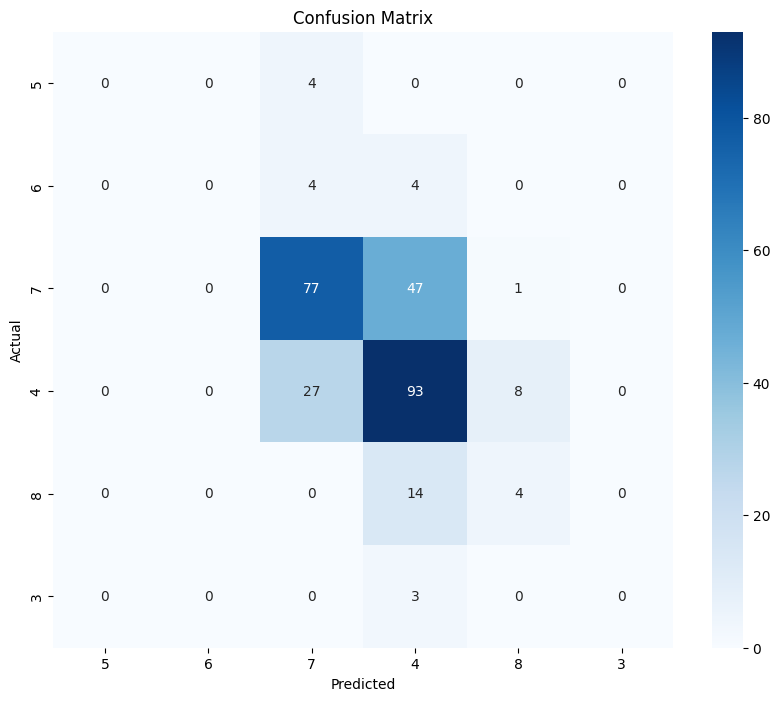

In [61]:
# Confusion matrix 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_predProbs = classifier.predict(x_test)
y_predClasses = y_predProbs.argmax(axis=-1) 

y_test_original = y_test.argmax(axis=1)

conf_matrix = confusion_matrix(y_test_original, y_predClasses)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=df["quality"].unique(), yticklabels=df["quality"].unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
